In [1]:
import pandas as pd 
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as stats
sns.set_style("darkgrid")

data = pd.read_excel('HW3 Data.xls')
df = pd.DataFrame(data)

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
Percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]

### Exercise 1: Exploring the data (25 points)

#### 1a) Are there duplicate households in the data? That is check if there are repeated observations in the unique household identifier variable. How many observations are there in the data?

In [3]:
duplicate_values = df['hhid'].duplicated()

# Counting the number of duplicates
number_of_duplicates = duplicate_values.sum()
markdown_str_duplicates = f"There are **{number_of_duplicates}** duplicates in the data."
display(Markdown(markdown_str_duplicates))

# Counting the number of observations 

num_observations = len(df)
markdown_str_obs = f"There are **{num_observations}** observations in the data."
display(Markdown(markdown_str_obs))


There are **0** duplicates in the data.

There are **2613** observations in the data.

#### 1b) Present some basic summary statistics for the following variables: head_gender, head _age, familysize, consumption, income, wealth. Comment your results in 2 lines. In particular, you might mention if there are missing observations or potential outliers for some of the variables.

In [4]:
Percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
sum_stats = df[['head_gender', 'head_age', 'familysize', 'consumption', 'income', 'wealth']].describe(percentiles=Percentiles)

# Creating a dictionary to map the old index names to the new ones
new_index_labels = {
    'count': "Amount of Observations",
    'mean': "Mean Values",
    'std': "Standard Deviation",
    'min': "Minimum Value",
    '5%': "5th Percentile",
    '10%': "10th Percentile",
    '25%': "25th Percentile",
    '50%': "50th Percentile",  # Median
    '75%': "75th Percentile",
    '90%': "90th Percentile",
    '95%': "95th Percentile",
    'max': "Maximum Value"
}

new_column_labels = {
    'head_gender': "Gender of Family Head",
    'head_age': 'Age of Family Head',
    'familysize': 'Size of Family',
    'consumption': 'Consumption (2013 USD)',
    'income': 'Income (2013 USD)',
    'wealth': 'Wealth (2013 USD)'
}


# Renaming the index using the dictionary
sum_stats_renamed = sum_stats.rename(columns = new_column_labels, index=new_index_labels)


sum_stats_renamed


,Gender of Family Head,Age of Family Head,Size of Family,Consumption (2013 USD),Income (2013 USD),Wealth (2013 USD)
Amount of Observations,"2,597.00","2,597.00","2,597.00","2,613.00","2,613.00","2,613.00"
Mean Values,1.31,46.07,7.48,"1,803.79","1,860.08","4,912.70"
Standard Deviation,0.46,15.07,3.71,"1,308.74","2,607.52","8,359.89"
Minimum Value,1.00,14.00,1.00,250.31,27.49,0.00
5th Percentile,1.00,25.00,2.00,491.21,139.81,68.94
10th Percentile,1.00,28.00,3.00,604.29,212.14,165.15
25th Percentile,1.00,34.00,5.00,918.32,471.20,720.02
50th Percentile,1.00,44.00,7.00,"1,426.61","1,061.19","2,108.60"
75th Percentile,2.00,56.00,9.00,"2,296.86","2,234.80","5,221.94"
90th Percentile,2.00,68.40,12.00,"3,470.91","4,223.74","11,837.65"


The mean household has 7-8 members, is headed by a 46 year old man (gender mean is 1.31 < 1.5), consumes almost all of its income of 1,860 USD, and has a wealth of 4,913 USD. The mean is skewed upwards by large outliers in income consumption, and wealth (e.g. the 95th percentile of consumption/income/wealth is approx. 3x/6x/10x the median). 16 observations are missing in the first three columns.



#### 1c) Using the head_gender variable, create a dummy variable for household head being female (1=female, 0=male). What is the proportion of households where the head is female?


In [5]:
df['Female'] = np.nan
df.loc[df['head_gender'] == 2, 'Female'] = 1
df.loc[df['head_gender'] == 1, 'Female'] = 0

proportion_household_fem = (df['Female'].mean())*100
proportion_household_fem_2sigfigs = f"{proportion_household_fem:.2f}"


markdown_1c = f"**{proportion_household_fem_2sigfigs}**% of households have female heads."
display(Markdown(markdown_1c))


**31.42**% of households have female heads.

#### 1d) Using the groupby method, compute the average consumption, average household size, and average household head age for households where the head is male vs where the head is female. Do we observe noticeable differences across the two groups?

In [6]:
vars_1d = df[['consumption', 'familysize', 'head_age', 'Female']].groupby(by='Female').mean()

## Renaming Columns
vars_1d = vars_1d.rename(columns={'familysize': 'Family Size','consumption': 'Consumption (2013 USD)',
                                  'head_age':'Age of Family Head'})

## Renaming Rows
vars_1d.index = vars_1d.index.map({0: 'Male Family Head', 1: 'Female Family Head'})

## Removing Indexing (the index 'Female' was unnecessary)
vars_1d.index.name = None

## Displaying the table
vars_1d


,Consumption (2013 USD),Family Size,Age of Family Head
Male Family Head,"1,898.30",7.72,44.39
Female Family Head,"1,593.26",6.96,49.73


As for all summary statistics, it is difficult to comment on the causal relationships underlying these conditional averages without additional data. However:

- Households that are headed by men consume 19% more. This could be because they earn more due to disrimination in the labor force or due to the lower educational attainment of women following educational discrimination. It could also be because they have on average about 1 more child.

- The female households heads are about five years older, which could be because some of them are widows. 

### Exercise 2. Inequality in Uganda (50 points).

#### 2a) Create the variables log_c, log_inc, log_w that are the log of consumption, income, and wealth, respectively. Plot in the same graph the distribution of the log of consumption and the log of income. Do the distributions resemble some known distribution? Is inequality higher in consumption or in income?

In [7]:
## Creating the log variables

df['log_consumption'] = np.log(df['consumption'])

df['log_income'] = np.log(df['income'])

df['log_wealth'] = np.log(df['wealth'])

# Removing infinities that occur when wealth = 0
df.replace([np.inf, -np.inf], np.nan, inplace = True) 


/Users/alexandrcarr/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/var/folders/tb/tb7zlgfn0ngdmf43v0_x7vsc0000gn/T/ipykernel_51198/1411464042.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  log_distributions = sns.kdeplot(df["log_consumption"], shade=False, label='Log Consumption', color = "b")
/var/folders/tb/tb7zlgfn0ngdmf43v0_x7vsc0000gn/T/ipykernel_51198/1411464042.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  log_distributions = sns.kdeplot(df["log_income"], shade=False, label='Log income', color = "r")


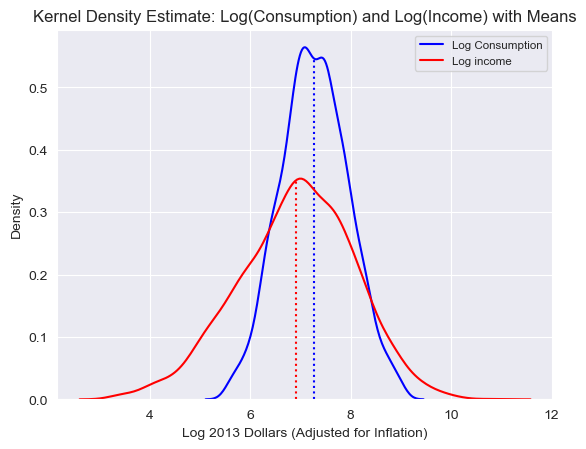

In [8]:
## Distribution plotting 

log_distributions, ax = plt.subplots() 

## Consumption Distribution

log_distributions = sns.kdeplot(df["log_consumption"], shade=False, label='Log Consumption', color = "b")

kdeline = ax.lines[0]
xs_cons = kdeline.get_xdata()
ys_cons = kdeline.get_ydata()
consumption_mean = df["log_consumption"].mean()
ax.vlines(consumption_mean, 0, np.interp(consumption_mean, xs_cons, ys_cons), color='blue', ls=':')

## Income Distribution

log_distributions = sns.kdeplot(df["log_income"], shade=False, label='Log income', color = "r")

kdeline = ax.lines[1]
xs_income = kdeline.get_xdata()
ys_income = kdeline.get_ydata()
income_mean = df["log_income"].mean()
ax.vlines(income_mean, 0, np.interp(income_mean, xs_income, ys_income), color='r', ls=':')

## Plotting

plt.legend(fontsize='small')
plt.xlabel('Log 2013 Dollars (Adjusted for Inflation)')
plt.title("Kernel Density Estimate: Log(Consumption) and Log(Income) with Means")
plt.show()

In [9]:
pd.DataFrame([[df["log_income"].kurtosis() - 3, df["log_consumption"].kurtosis() -3 ],[df["log_income"].var(), df["log_consumption"].var()],[df["log_income"].skew(), df["log_consumption"].skew()]], columns=["Income","Consumption"],index=["Excess Kurtosis",'Variance','Skew'])


,Income,Consumption
Excess Kurtosis,-3.04,-3.32
Variance,1.34,0.45
Skew,-0.22,0.04


**Comments**:
- One might be tempted to say the distributions are roughly normal, but the table above disproves this. The negative excess kurtosis implies both are platykurtic and the income distribution's -0.22 skew means it has a slight negative skew.

- Inequality is larger in log income. Log consumption has a higher concentration around the mean and is almost symmetric unlike the broader distribution of income with a slight negative skew (-0.22). This means there are many people in the lower to lower-middle income brackets and a few high-income outliers.


#### 2b) A commonly used statistic to measure inequality is the variance of the logs. Compute the variance of the log of consumption, of the log of income, and of the log of wealth. How do these measures of inequality in Uganda compare to the same measures of inequality in the United States? Use table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, R. (2018) for the comparison.

In [10]:
log_variables = ["log_consumption", "log_income", "log_wealth"]

US_variances = [0.79, 0.97, 2.11]

Uganda_variances = []

for var in log_variables:
    Uganda_variances = np.append(Uganda_variances,df[f'{var}'].var())
    
variance_log_2b = pd.DataFrame([Uganda_variances,US_variances], columns=log_variables, index=["Uganda","US"])

variance_log_2b = variance_log_2b.rename(columns = {
    'log_consumption' : 'Log (Consumption) Variance',
    'log_income': 'Log (Income) Variance',
    'log_wealth': 'Log (Wealth) Variance'
})

variance_log_2b
  

,Log (Consumption) Variance,Log (Income) Variance,Log (Wealth) Variance
Uganda,0.45,1.34,2.68
US,0.79,0.97,2.11


Uganda has a higher variance in log (Income) and log (Wealth), but the United States has higher log (Consumption) variance. This suggests that there may be a greater disparity in consumption, but smaller in income and wealth in the US.

#### 2c) Measuring between rural and urban inequality in Uganda. Compute the average consumption, income, and wealth for rural and urban areas separately (groupby). Are the differences between the two areas large?


In [11]:
vars_2c_mean = df[['consumption', 'income', 'wealth', 'urban']].groupby(by='urban').mean()

vars_2c_mean = vars_2c_mean.rename(columns={'consumption': 'Mean Consumption (2013 USD)', 
                                  'income': 'Mean Income (2013 USD)',
                                  'wealth':'Mean Wealth (2013 USD)'})

vars_2c_mean.index = vars_2c_mean.index.map({0: 'Rural', 1: 'Urban'})

vars_2c_mean.index.name = None

title_mean = f'**Mean Values of Consumption, Income, and Wealth**'

display(Markdown(title_mean))


vars_2c_mean


**Mean Values of Consumption, Income, and Wealth**

,Mean Consumption (2013 USD),Mean Income (2013 USD),Mean Wealth (2013 USD)
Rural,"1,629.45","1,713.96","4,521.00"
Urban,"2,544.22","2,480.62","6,576.26"


In [12]:
## Percentage Difference 

cons_inc_wealth = ['Mean Consumption (2013 USD)', 'Mean Income (2013 USD)', 'Mean Wealth (2013 USD)']

percentage_difference_urban_rural = {}

for var in cons_inc_wealth:
    percentage_difference_urban_rural[f"{var}"] = ((vars_2c_mean.loc["Urban", f"{var}"] / vars_2c_mean.loc["Rural", f"{var}"]) - 1) * 100
    
title_urb_rural_mean_diff = f'**Percentage Difference between Urban and Rural Areas**'

display(Markdown(title_urb_rural_mean_diff))


pd.DataFrame(percentage_difference_urban_rural, index=["Urban-Rural (%) Difference:"])



**Percentage Difference between Urban and Rural Areas**

,Mean Consumption (2013 USD),Mean Income (2013 USD),Mean Wealth (2013 USD)
Urban-Rural (%) Difference:,56.14,44.73,45.46


In [13]:
vars_2c_median = df[['consumption', 'income', 'wealth', 'urban']].groupby(by = 'urban').median()


vars_2c_median = vars_2c_median.rename(columns={'consumption': 'Median Consumption (2013 USD)', 
                                  'income': 'Median Income (2013 USD)',
                                  'wealth':'Median Wealth (2013 USD)'})

vars_2c_median.index = vars_2c_median.index.map({0: 'Rural', 1: 'Urban'})

vars_2c_median.index.name = None

title_median = f'**Median Values of Consumption, Income, and Wealth**'

display(Markdown(title_median))

vars_2c_median


**Median Values of Consumption, Income, and Wealth**

,Median Consumption (2013 USD),Median Income (2013 USD),Median Wealth (2013 USD)
Rural,"1,302.97",967.55,"2,156.85"
Urban,"2,103.58","1,576.13","1,783.50"


In [14]:
cons_inc_wealth = ['Consumption (2013 USD)', 'Income (2013 USD)', 'Wealth (2013 USD)']


Rural_mean_median_deviation = {}
Urban_mean_median_deviation = {}


for var in cons_inc_wealth:
    Rural_mean_median_deviation[var] = ((vars_2c_mean.loc['Rural', f'Mean {var}'] / vars_2c_median.loc['Rural', f'Median {var}']) - 1) * 100
    Urban_mean_median_deviation[var] = ((vars_2c_mean.loc['Urban', f'Mean {var}'] / vars_2c_median.loc['Urban', f'Median {var}']) - 1) * 100

    
title_mean_median_diff = f'**Percentage Differences Between Mean and Median**'

display(Markdown(title_mean_median_diff))
   
    

results_df = pd.DataFrame([Rural_mean_median_deviation, Urban_mean_median_deviation], index=['Rural', 'Urban'])
results_df

**Percentage Differences Between Mean and Median**

,Consumption (2013 USD),Income (2013 USD),Wealth (2013 USD)
Rural,25.06,77.14,109.61
Urban,20.95,57.39,268.73


**Average tendency:**
- The second table (*Percentage Differences Between Urban and Rural Areas*) revelas that urban areas have 56% higher consumption, a 45% larger mean income, and 45% greater mean wealth. This likely reflects the greater educational and employment opoortunities in urban areas, the higher purchasing power and wages, and concentration of rich people.

**Distribution:**

- The final table (*Percentage Differences Between Mean and Median*) suggests there are large positive outliers in rural and urban areas that skew the mean upwards from the median. This is most pronounced for income in rural areas (77%) and wealth in urban areas (269%). 

  

#### 2d) Measuring within rural and urban inequality in Uganda. Compute the variance of the log of consumption, income, and wealth for rural and urban areas separately.


In [15]:
vars_2d = df[['log_consumption', 'log_income', 'log_wealth', 'urban']].groupby(by='urban').var()

vars_2d = vars_2d.rename(columns={'log_consumption': 'Log (Consumption) Variance', 'log_income': 'Log (Income) Variance',
                                  'log_wealth':'Log (Wealth) Variance'})

vars_2d.index = vars_2d.index.map({0: 'Rural', 1: 'Urban'})

vars_2d.index.name = None

vars_2d


,Log (Consumption) Variance,Log (Income) Variance,Log (Wealth) Variance
Rural,0.41,1.34,2.39
Urban,0.44,1.11,3.92


Log (Consumption) and Log (Wealth) variance are higher for urban areas, whereas log (income) is higher for rural areas. However, log (Consumption) variance is verys similar. This is in line with the previous observations that there are substantial outliers in log (Income) in rural areas and much larger outliers in log (Wealth) in urban areas.

#### 2e) Compute the Gini coefficient in consumption, in income, and in wealth in Uganda. Com- pare these values with the Gini coefficients in the United States—table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, R. (2018)


In [16]:
def gini(array):
    # from: https://github.com/oliviaguest/gini
    #http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm 
    array = np.array(array)
    array = array.flatten() 
    if np.amin(array) < 0:
        array += np.amin(array) 
    array += 0.0000001 
    array = np.sort(array) 
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) 

gini_coefficients = df[['consumption', 'income','wealth']].apply(gini)

In [17]:
# Comparing gini in US and Uganda:

con_inc_wlt = ['consumption','income','wealth']
US_gini = [0.41,0.44,0.79]          #Magalhães, L., & Santaeulàlia-Llopis, R. (2018)
UG_gini = list(gini_coefficients)

pd.DataFrame([UG_gini,US_gini], columns=con_inc_wlt, index=["Uganda","US"])

,consumption,income,wealth
Uganda,0.37,0.56,0.66
US,0.41,0.44,0.79


As the GINI coeff approaches 1, the country becomes more unequal. This means that the United States is more unequal in wealth and consumption. 

This is in contrast to the log of variance approach, which implied that Uganda had a higher income AND wealth inequality (yet similarly implied lower consumption inequality). The discrepancy in these two inequality metrics might be due to the fact that the Gini coefficient is more sensitive to the middle ranges of the distribution and the log of variance more sensitive to the lower ranges

#### 2f) Compute the share of the wealth that the bottom 50 percent hold. Compute the share of the wealth that the top 10, 5, and 1 percent hold.


In [18]:
from IPython.display import Markdown

# Bottom 50%
sorted_wealth = df['wealth'].sort_values(ignore_index=True)
cumulative_sum = sorted_wealth.cumsum()
index = int(0.5 * len(sorted_wealth))
wealth_share = (cumulative_sum.loc[index] / cumulative_sum.iloc[-1]) * 100  # Convert to percentage
markdown_bottom = f"The wealth share of the bottom **{round(0.5100)}%** is **{wealth_share:.2g}%**"
display(Markdown(markdown_bottom))

# Top 10%, 5%, 1%
sorted_wealth = df['wealth'].sort_values(ignore_index=True, ascending=False)
cumulative_sum = sorted_wealth.cumsum()
wealth_share_list = [0.1, 0.05, 0.01]

for share in wealth_share_list:
    index = int(share * len(sorted_wealth))
    wealth_share = (cumulative_sum.loc[index] / cumulative_sum.iloc[-1]) * 100  # Convert to percentage
    markdown_top = f"The wealth share of the top **{round(share * 100)}%** is **{wealth_share:.2g}%**"
    display(Markdown(markdown_top))


The wealth share of the bottom **1%** is **8.2%**

The wealth share of the top **10%** is **51%**

The wealth share of the top **5%** is **35%**

The wealth share of the top **1%** is **12%**

#### 2g) Although in the last years, there has been a big debate on inequality, the debate has mostly focused on rich countries. From your results of this exercise, discuss whether inequality is relatively large in Uganda with respect to rich countries.

**Wealth and Consumption Inequality: US is more unequal**

The United States' top 1% wealth share is about 26.5%, which is much higher than Uganda's 11.9%. Similarly, the top 10% in the US own 70% of the wealth, compared to 51% in Uganda. However, it must also be noted that it is much easier to collect data on the wealth of the top 10% of Americans than in Uganda. Revealing hidden or unmeasured wealth of the top 1% might substantially alter the results.

If measured using the GINI coefficient and log variances, Uganda also has more equal consumption. There can be many explanations for this - cultural elements (e.g. individualism vs collectivism) or lower incomes and higher income inequality could mean that most of the income for many goes towards basic needs. 


**Income Inequality: Uganda is more unequal**

On the other hand, Uganda had a less equal income distribution, as measured by the GINI coefficient and log variances. Other rich countries with stronger safety nets and redistributions programs (e.g. some EU members) tend to be more equal than the US. The mean GINI for income in the EU is 29.6 (Statista, 2022), implying EU countries much more equal than Uganda and the US in terms of income.


Source: https://www.statista.com/statistics/1417444/inequality-in-europe-gini-coefficient-eu-eurozone/#:~:text=As%20of%202022%2C%20the%20Gini,blocs%20over%20the%20past%20decade.





#### 2h) The few previous studies on income inequality in Africa had to rely on consumption measures to estimate income inequality. See, for example, Alvaredo & Gasparini (2005). Debate on the advantages and disadvantages of using consumption measures to study income inequality.



**Conclusion:**

Consumption data reveal important insights on ineqaulity but should be used in conjunction with other metrics, like income or indebtedness. 


**Benefits:**

1) Consumption can be considered a stronger proxy for well-being. By studying the nature of consumption, we can partially understand the distribution of well-being within families. For instance, if a majority of income is spent on goods supporting the family (e.g. food, shelter, and medication), we can understand ineqality on a family level and how that impacts the well-being of its members. This also then gives insight into another dimension of gender inequality (e.g. do families spend less on female than male children).


2) Consumption does not suffer from avoidance issues lke taxation (e.g. taxes are avoided or underreported), implying consumption might be a more accurate / less biased metric. 

3) Consumption includes non-market activities (e.g. subsistence farming), which can be important for poorer communities.  


**Drawbacks:**

1) Consumption does not account for asset inequality, which is an essential transmission mechanism for generational inequality. 

2) Consumption data does not capture important issues like the indebtedness of the consumers. Combining income, consumption, and debt statistics would give a stronger perspective on the health of household balance sheets. 

3) There may be many issues in accurately measuring, collecting, and standardizing consumption data.






### Exercise 3: The lifecycle of male vs female head households in Uganda

#### 3a) Plot the lifecycle of the log of consumption for households where the head is male and for households where the head is female.

In [19]:
## Truncating ages

df = df[(df['head_age'] > 18) & (df['head_age'] < 80)]

## Creating bins for ages 

bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70+' ]

df['age_bins'] = pd.cut(df['head_age'], bins, labels=labels)

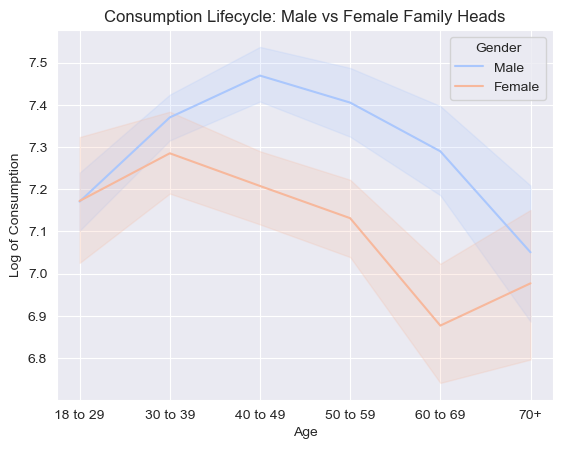

In [20]:
## Polotting lifecycle 

fig, ax = plt.subplots()
fig_lifecycle = sns.lineplot(x = 'age_bins', y = 'log_consumption', hue='Female', data=df, palette = 'coolwarm')

legend_labels = ['Male', 'Female']  # Define your new labels here
handles, _ = ax.get_legend_handles_labels()  # Get existing handles
ax.legend(handles, legend_labels, title='Gender')

plt.title('Consumption Lifecycle: Male vs Female Family Heads')
plt.ylabel('Log of Consumption')
plt.xlabel('Age')
plt.show()

#### 3b) Redo the same plot for the log of income (i) and for the log of wealth (ii).

##### (i) Log of Income Lifecycle plot

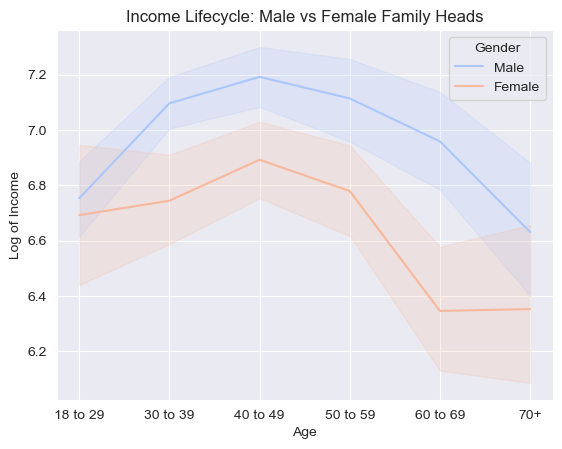

In [21]:
fig, ax = plt.subplots()
fig_lifecycle = sns.lineplot(x = 'age_bins', y= 'log_income', hue='Female', data=df, palette = 'coolwarm')

legend_labels = ['Male', 'Female']  # Define your new labels here
handles, _ = ax.get_legend_handles_labels()  # Get existing handles
ax.legend(handles, legend_labels, title='Gender')

plt.title('Income Lifecycle: Male vs Female Family Heads')
plt.ylabel('Log of Income')
plt.xlabel('Age')
plt.show()

##### (ii) Log of Wealth Lifecycle plot

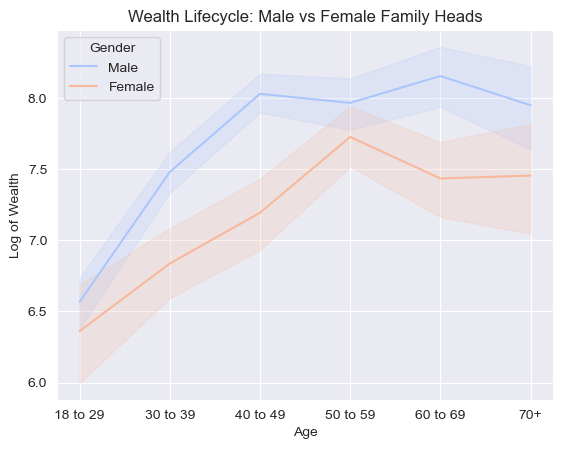

In [22]:
fig, ax = plt.subplots()
fig_lifecycle = sns.lineplot(x = 'age_bins', y= 'log_wealth', hue='Female', data=df, palette = 'coolwarm')

legend_labels = ['Male', 'Female']  # Define your new labels here
handles, _ = ax.get_legend_handles_labels()  # Get existing handles
ax.legend(handles, legend_labels, title='Gender')

plt.title('Wealth Lifecycle: Male vs Female Family Heads')
plt.ylabel('Log of Wealth')
plt.xlabel('Age')
plt.show()

#### 3c) What are the differences in the lifecycle of consumption, income, and wealth of households across the gender of the household heads? Comment your results.

Male-led households tend to have consisistently higher income, wealth, and consumption across all
age groups. However, consumption tends to be closer between the genders at early and
later ages, with the biggest gaps occuring around age 40. Male-led households tend to have similar
income to female-led ones at early ages, but then those diverge and don't converge later. Wealth tends
to be similar with a gap at around age 40, convergence at age 50, and then another gap for later ages.

This trend broadly makes sense as one would expect male-led households to earn more due to wage gaps
and different forms of discrimination that women are likely to face prior to and in the labour market.
The trend of higher equality between some variables early on with a divergence at later ages
indicates that men and women might find it equally easy to enter the labour market,
but men find it easier to climb the ladder.